In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.tools.plotting import table
%matplotlib inline 
sns.set(style="darkgrid")
massa = pd.read_csv('legislativo', delimiter=";", encoding='UTF-8',header=0,index_col = 0)

In [2]:
plt.rcParams['figure.figsize'] = (14,8)

In [3]:
#Tarefa 1 Subprocesso Análise Partido 3-2
#Selection o Partido a ser analizado
massa_partido = massa[massa.PARTIDO == 'PT']


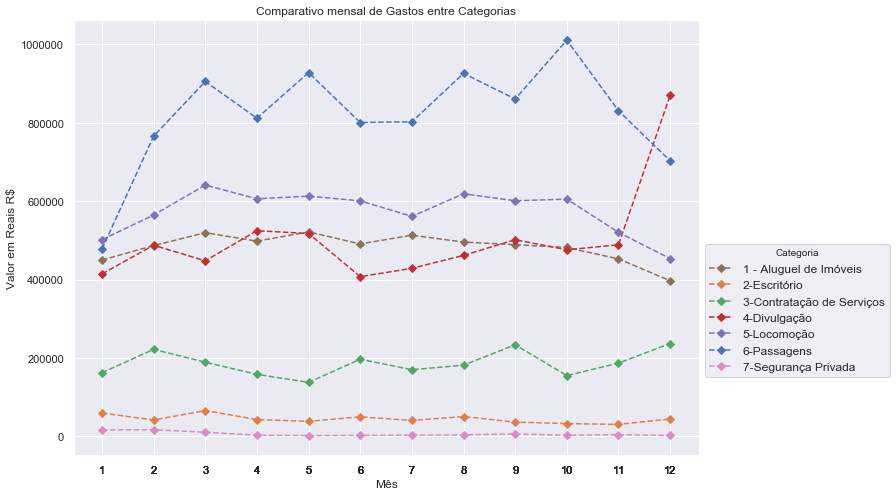

In [4]:
#Grafico 8
#Sub 3-2-1
#Olhando para um Partido e vendo todas as categorias durante o ano

#Agrupa por categoria de despesa e mes
gastos_todas_cat = massa_partido.groupby(['CAT_DESPESA','MES'], as_index=False)['VALOR'].sum()

#Associando cata despesa a 1 Dataset
gastos_cat_1 = gastos_todas_cat[(gastos_todas_cat.CAT_DESPESA == 1)]
gastos_cat_2 = gastos_todas_cat[(gastos_todas_cat.CAT_DESPESA == 2)]
gastos_cat_3 = gastos_todas_cat[(gastos_todas_cat.CAT_DESPESA == 3)]
gastos_cat_4 = gastos_todas_cat[(gastos_todas_cat.CAT_DESPESA == 4)]
gastos_cat_5 = gastos_todas_cat[(gastos_todas_cat.CAT_DESPESA == 5)]
gastos_cat_6 = gastos_todas_cat[(gastos_todas_cat.CAT_DESPESA == 6)]
gastos_cat_7 = gastos_todas_cat[(gastos_todas_cat.CAT_DESPESA == 7)]

#Plotando
ax13 = gastos_cat_1.plot(kind='line', x="MES", y="VALOR", marker="D",xticks=gastos_todas_cat['MES'], color='#8E7157', linestyle="--")
ax13 = gastos_cat_2.plot(kind='line', x="MES", y="VALOR", marker="D",xticks=gastos_todas_cat['MES'], color='#DD804D', linestyle="--",ax=ax13)
ax13 = gastos_cat_3.plot(kind='line', x="MES", y="VALOR", marker="D",xticks=gastos_todas_cat['MES'], color='#52A767', linestyle="--",ax=ax13)
ax13 = gastos_cat_4.plot(kind='line', x="MES", y="VALOR", marker="D",xticks=gastos_todas_cat['MES'], color='#BE3235', linestyle="--",ax=ax13)
ax13 = gastos_cat_5.plot(kind='line', x="MES", y="VALOR", marker="D",xticks=gastos_todas_cat['MES'], color='#8273B4', linestyle="--",ax=ax13)
ax13 = gastos_cat_6.plot(kind='line', x="MES", y="VALOR", marker="D",xticks=gastos_todas_cat['MES'], color='#4D73B1', linestyle="--",ax=ax13)
ax13 = gastos_cat_7.plot(kind='line', x="MES", y="VALOR", marker="D",xticks=gastos_todas_cat['MES'], color='#DA8CC3', linestyle="--",ax=ax13)
ax13.set_ylabel("Valor em Reais R$")
ax13.set_xlabel("Mês")
ax13.legend(['1 - Aluguel de Imóveis','2-Escritório','3-Contratação de Serviços',
             '4-Divulgação','5-Locomoção','6-Passagens','7-Segurança Privada'],fontsize=12,
            loc='upper left', bbox_to_anchor=(1, 0.5),#pondo a legenda para fora do graph
           title='Categoria') 
ax13.grid(True)
ax13.set_title('Comparativo mensal de Gastos entre Categorias')
#diminuindo o tamanho do grafico em 20%
box = ax13.get_position() 
ax13.set_position([box.x0, box.y0, box.width * 0.8, box.height])


In [5]:
#Tarefa 2 Subprocesso Análise Partido 3-2
#Selecionar a categoria dentro do partido
massa_partido_cat = massa_partido[(massa_partido.CAT_DESPESA == 6)] 

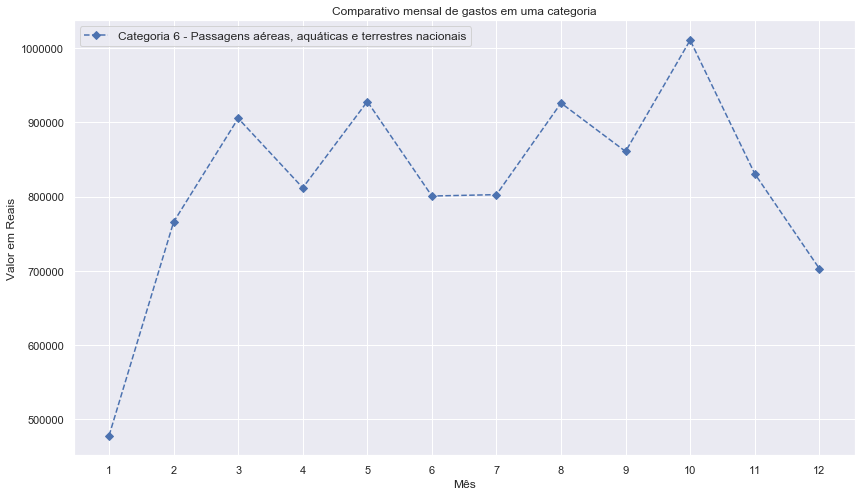

In [6]:
#Gráfico 9
#sub 3-2-2

#agrupado por mes, afffunc soma
combustivel_mes = massa_partido_cat.groupby("MES", as_index=False).sum()

#plotando
ax21 = combustivel_mes.plot(kind= 'line', title='Comparativo mensal de gastos em uma categoria', x="MES", y="VALOR", marker="D",xticks=combustivel_mes['MES'], linestyle="--")
ax21.set_ylabel("Valor em Reais")
ax21.set_xlabel("Mês")
ax21.legend(['Categoria 6 - Passagens aéreas, aquáticas e terrestres nacionais'],fontsize=12)
ax21.grid(True)

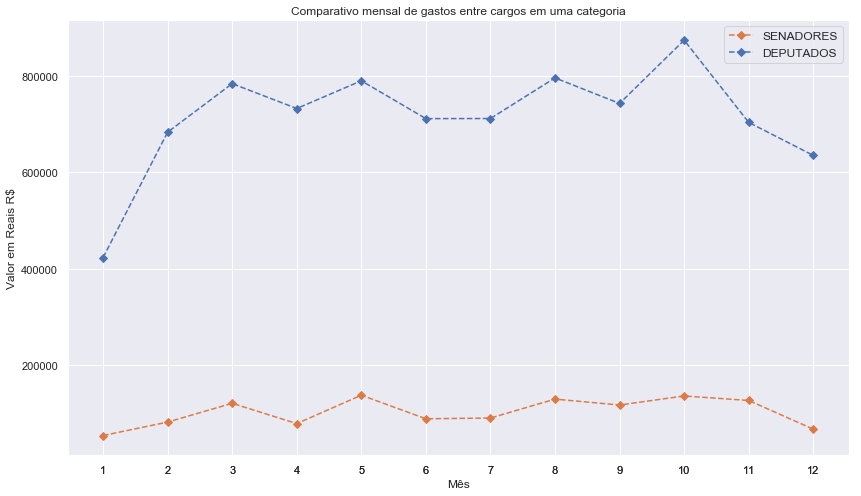

In [7]:
# Gráfico 10
# Sub 3-2-3

#combustivel_mes_media
combustivel_mes_cargo = massa_partido_cat.groupby(['CARGO','MES'], as_index=False)['VALOR'].sum()

#seleciona os senadores e deputados joga pro df para poder diferenciar
combustivel_mes_dep = combustivel_mes_cargo.loc[combustivel_mes_cargo['CARGO'] == "D"] 
combustivel_mes_sen = combustivel_mes_cargo.loc[combustivel_mes_cargo['CARGO'] == "S"]

#plotar
nova = combustivel_mes_sen.plot(kind= 'line',title='Comparativo mensal de gastos entre cargos em uma categoria' , x="MES", y="VALOR", marker="D",xticks=combustivel_mes_cargo['MES'], color='#DB7B48',linestyle="--")
combustivel_mes_dep.plot(kind= 'line', x="MES", y="VALOR", marker="D",xticks=combustivel_mes_cargo['MES'], linestyle="--",color='#4C72B0',ax=nova)
nova.set_ylabel("Valor em Reais R$")
nova.set_xlabel("Mês")
nova.legend(["SENADORES","DEPUTADOS"],fontsize=12)
nova.grid(True)

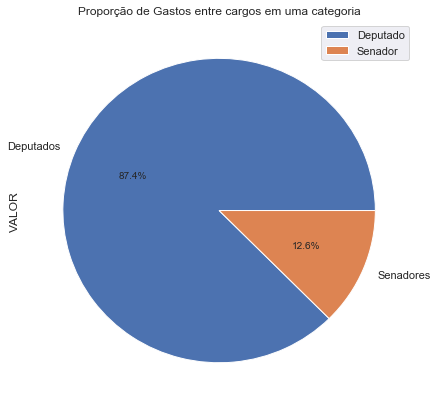

In [8]:
#Gráfico 11
#Sub 3-2-4

#agrupado por mes, o .mean faz a média
combustivel_cargo= massa_partido_cat.groupby("CARGO", as_index=False).sum()

#Plotando
ax22 = combustivel_cargo.plot(kind='pie',title='Proporção de Gastos entre cargos em uma categoria', labels=['Deputados','Senadores'], y='VALOR',autopct='%1.1f%%',figsize=(7,7))
ax22.legend(["Deputado","Senador"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  del sys.path[0]


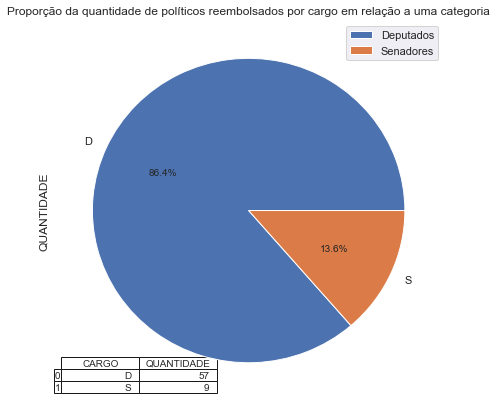

In [9]:
#Grafico 12
#Sub 3-2-5

#Contar a quantidade de deputados e senadores
teste= massa_partido_cat.groupby('CARGO')['NOME'].nunique().reset_index()

#Alterar o nome da coluna
teste.rename(columns={'NOME':'QUANTIDADE'},inplace=True)

#plotar
ax3 = teste.plot(kind='pie',title='Proporção da quantidade de políticos reembolsados por cargo em relação a uma categoria', y='QUANTIDADE',colors =['b','#DB7B48'],labels=['D','S'],autopct='%1.1f%%',figsize=(7,7))
ax3.legend(["Deputados","Senadores"],loc='upper right')
table(ax=ax3,data=teste,loc='lower left', colWidths=[0.2, 0.2, 0.2])

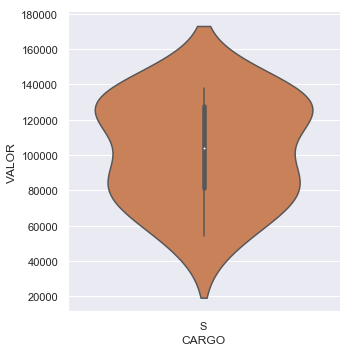

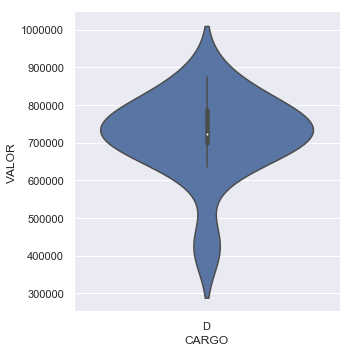

In [10]:
#Gráfico 13 e 14
#Sub 3-2-6

#Agrupando
categoria_mes_cargo = massa_partido_cat.groupby(['CARGO','MES'], as_index=False)['VALOR'].sum()

#Selecionando os registros
combustivel_mes_dep = categoria_mes_cargo.loc[categoria_mes_cargo['CARGO'] == "D"] 
combustivel_mes_sen = categoria_mes_cargo.loc[categoria_mes_cargo['CARGO'] == "S"]

#Tendencia de gastos com violin plot
ax7 = sns.catplot(kind='violin',x='CARGO',y='VALOR',data=combustivel_mes_sen,figsize=(10,10),color='#DB7B48')
ax7 = sns.catplot(kind='violin',x='CARGO',y='VALOR',data=combustivel_mes_dep,figsize=(10,10),color='b',title='Distribuição e densidade dos gastos entre cargos em uma categoria')

Text(0.5,1,'Distribuição dos gastos entre cargos em uma categoria - Comparativo Mensal')

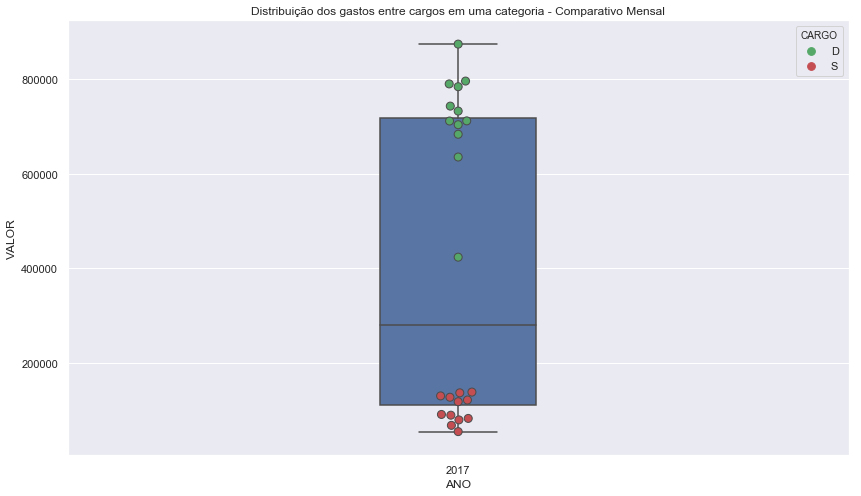

In [11]:
#Gráfico 15
#Sub 3-2-7

#Agrupando
categoria_mes_cargo2 = massa_partido_cat.groupby(['ANO','CARGO','MES'], as_index=False)['VALOR'].sum()

#Plotando
ax6 = sns.boxplot(y='VALOR',data=categoria_mes_cargo2,width=0.2)
ax6 = sns.swarmplot(y='VALOR',x='ANO',hue='CARGO',data=categoria_mes_cargo2,palette=["g", "r"],size=8, linewidth=1)
ax6.set_title('Distribuição dos gastos entre cargos em uma categoria - Comparativo Mensal')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  del sys.path[0]


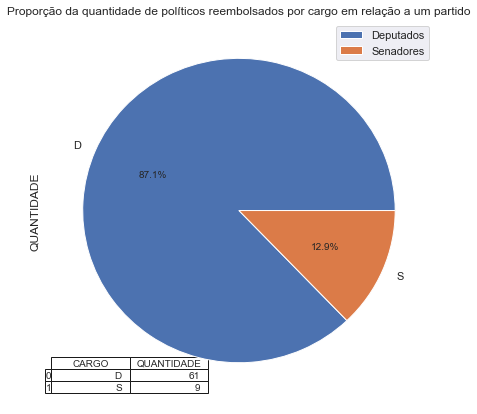

In [12]:
#Gráfico 16
#Sub 3-2-8

#Contar a quantidade de deputados e senadores
qtd_politico= massa_partido.groupby('CARGO')['NOME'].nunique().reset_index()

#Alterar o nome da coluna
qtd_politico.rename(columns={'NOME':'QUANTIDADE'},inplace=True)

#plotar
ax3 = qtd_politico.plot(kind='pie',title='Proporção da quantidade de políticos reembolsados por cargo em relação a um partido', y='QUANTIDADE',colors =['b','#DB7B48'],labels=['D','S'],autopct='%1.1f%%',figsize=(7,7))
ax3.legend(["Deputados","Senadores"],loc='upper right')
table(ax=ax3,data=qtd_politico,loc='lower left', colWidths=[0.2, 0.2, 0.2])